In [356]:
import matplotlib as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [357]:
#Reading in the datasets

In [358]:
train = pd.read_csv('train.csv')
mi = pd.read_csv('meal_info.csv')
fci = pd.read_csv('fulfilment_center_info.csv')
test = pd.read_csv('test.csv')

In [359]:
train=train.loc[train['num_orders']<5000,:]

In [360]:
#Combining tables to create final table

In [361]:
meal_merge = pd.merge(train,
                 mi[['meal_id','category', 'cuisine']],
                 on='meal_id')

final_df = pd.merge(meal_merge,
                    fci[['center_id','city_code', 'region_code','center_type','op_area']],
                    on='center_id')
final_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [362]:
#####Creating test data set##########

In [363]:
test_merge1 = pd.merge(test,
                 mi[['meal_id','category', 'cuisine']],
                 on='meal_id')

final_test = pd.merge(test_merge1,
                    fci[['center_id','city_code', 'region_code','center_type','op_area']],
                    on='center_id')
final_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [364]:
#########Seperating by regions based on visualizations##########
#########Creating models for each region#########

In [365]:
########## Region 56 #############

In [366]:
r56 = final_df[final_df.region_code == 56]

In [367]:
r56.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191045 entries, 0 to 450431
Data columns (total 15 columns):
id                       191045 non-null int64
week                     191045 non-null int64
center_id                191045 non-null int64
meal_id                  191045 non-null int64
checkout_price           191045 non-null float64
base_price               191045 non-null float64
emailer_for_promotion    191045 non-null int64
homepage_featured        191045 non-null int64
num_orders               191045 non-null int64
category                 191045 non-null object
cuisine                  191045 non-null object
city_code                191045 non-null int64
region_code              191045 non-null int64
center_type              191045 non-null object
op_area                  191045 non-null float64
dtypes: float64(3), int64(9), object(3)
memory usage: 23.3+ MB


In [368]:
#Dropping unecessary columns

In [369]:
clean_r56 = r56.drop(['center_id','meal_id','id','week','region_code','city_code'], axis=1)

In [370]:
clean_r56.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191045 entries, 0 to 450431
Data columns (total 9 columns):
checkout_price           191045 non-null float64
base_price               191045 non-null float64
emailer_for_promotion    191045 non-null int64
homepage_featured        191045 non-null int64
num_orders               191045 non-null int64
category                 191045 non-null object
cuisine                  191045 non-null object
center_type              191045 non-null object
op_area                  191045 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 14.6+ MB


In [371]:
final_r56 = pd.get_dummies(clean_r56,drop_first=True)

In [372]:
#Rearranging columns

In [373]:
cols = list(final_r56.columns.values)

In [374]:
cols

['checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'op_area',
 'category_Biryani',
 'category_Desert',
 'category_Extras',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Soup',
 'category_Starters',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai',
 'center_type_TYPE_B',
 'center_type_TYPE_C']

In [375]:
final_r56 = final_r56[['num_orders',
 'op_area',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'category_Biryani',
 'category_Desert',
 'category_Extras',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Soup',
 'category_Starters',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai',
 'center_type_TYPE_B',
 'center_type_TYPE_C']]

In [376]:
final_r56.head(1)

,num_orders,op_area,checkout_price,base_price,emailer_for_promotion,homepage_featured,category_Biryani,category_Desert,category_Extras,category_Fish,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,177,2.0,136.83,152.29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [377]:
#Splitting data into training and testing sets

In [378]:
X = final_r56.iloc[:, 2:24].values  
y = final_r56.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [379]:
r56_rf = RandomForestRegressor(n_estimators=1000, random_state=0)  
r56_rf.fit(X_train, y_train)  
y_pred = r56_rf.predict(X_test)

In [380]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 244.90866704762922
Root Mean Squared Log Error: 0.6598557285160552


In [381]:
#Predicting on Test

In [382]:
r56_test = final_test[final_test.region_code == 56]

clean_r56_test = r56_test.drop(['center_id','meal_id','week','region_code','city_code'], axis=1)

final_r56_test = pd.get_dummies(clean_r56_test,drop_first=True)

cols = list(final_r56_test.columns.values)

In [383]:
r56_test.shape

(13683, 14)

In [384]:
cols

['id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'op_area',
 'category_Biryani',
 'category_Desert',
 'category_Extras',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Soup',
 'category_Starters',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai',
 'center_type_TYPE_B',
 'center_type_TYPE_C']

In [385]:
final_r56_test = final_r56_test[['id',
                                 'op_area',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 
 'category_Biryani',
 'category_Desert',
 'category_Extras',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Soup',
 'category_Starters',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai',
 'center_type_TYPE_B',
 'center_type_TYPE_C']]

In [386]:
test_score_r56 = final_r56_test.iloc[:, 2:24].values

In [387]:
num_orders_r56 = r56_rf.predict(test_score_r56)

In [388]:
num_orders_r56_results = np.ceil(num_orders_r56)

In [389]:
num_orders_r56_results

array([ 49., 186., 198., ...,  74.,  74.,  45.])

In [390]:
sol_df_r56 = pd.DataFrame({'id':final_r56_test.id, 'num_orders': num_orders_r56_results})

In [391]:
sol_df_r56.shape

(13683, 2)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001989CF7FBC8>


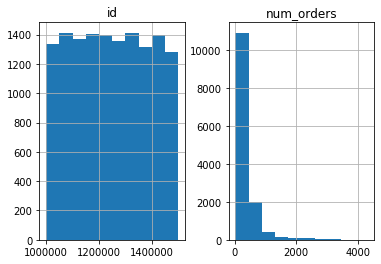

In [392]:
print(sol_df_r56.hist())

In [393]:
############Region 85###################

In [394]:
r85 = final_df[final_df.region_code == 85]

In [395]:
r85.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30274 entries, 5146 to 437631
Data columns (total 15 columns):
id                       30274 non-null int64
week                     30274 non-null int64
center_id                30274 non-null int64
meal_id                  30274 non-null int64
checkout_price           30274 non-null float64
base_price               30274 non-null float64
emailer_for_promotion    30274 non-null int64
homepage_featured        30274 non-null int64
num_orders               30274 non-null int64
category                 30274 non-null object
cuisine                  30274 non-null object
city_code                30274 non-null int64
region_code              30274 non-null int64
center_type              30274 non-null object
op_area                  30274 non-null float64
dtypes: float64(3), int64(9), object(3)
memory usage: 3.7+ MB


In [396]:
#Dropping unecessary columns

In [397]:
clean_r85 = r85.drop(['center_id','meal_id','id','week','region_code','city_code'], axis=1)

In [398]:
clean_r85.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30274 entries, 5146 to 437631
Data columns (total 9 columns):
checkout_price           30274 non-null float64
base_price               30274 non-null float64
emailer_for_promotion    30274 non-null int64
homepage_featured        30274 non-null int64
num_orders               30274 non-null int64
category                 30274 non-null object
cuisine                  30274 non-null object
center_type              30274 non-null object
op_area                  30274 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 2.3+ MB


In [399]:
final_r85 = pd.get_dummies(clean_r85,drop_first=True)

In [400]:
#Rearranging columns

In [401]:
cols = list(final_r85.columns.values)

In [402]:
cols

['checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'op_area',
 'category_Biryani',
 'category_Desert',
 'category_Extras',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Soup',
 'category_Starters',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai',
 'center_type_TYPE_B',
 'center_type_TYPE_C']

In [403]:
final_r85 = final_r85[['num_orders',
 'op_area',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'category_Biryani',
 'category_Desert',
 'category_Extras',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Soup',
 'category_Starters',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai',
 'center_type_TYPE_B',
 'center_type_TYPE_C']]

In [404]:
final_r85.head(1)

,num_orders,op_area,checkout_price,base_price,emailer_for_promotion,homepage_featured,category_Biryani,category_Desert,category_Extras,category_Fish,...,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
5146,1498,3.6,136.83,136.83,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [405]:
#Splitting data into training and testing sets

In [406]:
X = final_r85.iloc[:, 2:24].values  
y = final_r85.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [407]:
r85_rf = RandomForestRegressor(n_estimators=1000, random_state=0)  
r85_rf.fit(X_train, y_train)  
y_pred = r85_rf.predict(X_test)

In [408]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))

Root Mean Squared Error: 203.44140061984777
Root Mean Squared Log Error: 0.6177245793839238


In [409]:
#Predicting on Test

In [410]:
r85_test = final_test[final_test.region_code == 85]

clean_r85_test = r85_test.drop(['center_id','meal_id','week','region_code','city_code'], axis=1)

final_r85_test = pd.get_dummies(clean_r85_test,drop_first=True)

cols = list(final_r85_test.columns.values)

In [411]:
cols

['id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'op_area',
 'category_Biryani',
 'category_Desert',
 'category_Extras',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Soup',
 'category_Starters',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai',
 'center_type_TYPE_B',
 'center_type_TYPE_C']

In [412]:
final_r85_test = final_r85_test[['id','op_area',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'category_Biryani',
 'category_Desert',
 'category_Extras',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Soup',
 'category_Starters',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai',
 'center_type_TYPE_B',
 'center_type_TYPE_C']]

In [413]:
test_score_r85 = final_r85_test.iloc[:, 2:24].values

In [414]:
num_orders_r85 = r85_rf.predict(test_score_r85)

In [415]:
num_orders_r85_results = np.ceil(num_orders_r85)

In [416]:
num_orders_r85_results

array([ 853., 1071.,  350., ...,   99.,   18.,   18.])

In [417]:
sol_df_r85 = pd.DataFrame({'id':final_r85_test.id, 'num_orders': num_orders_r85_results})

In [418]:
##################Region 34 and 77#################################

In [419]:
r3477 = final_df[(final_df.region_code == 34)  | (final_df.region_code == 77)]

In [420]:
r3477.tail(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
456280,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456281,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456282,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456283,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5
456284,1443704,145,61,2104,581.03,582.03,0,0,27,Fish,Continental,473,77,TYPE_A,4.5


In [421]:
r3477.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211280 entries, 17170 to 456284
Data columns (total 15 columns):
id                       211280 non-null int64
week                     211280 non-null int64
center_id                211280 non-null int64
meal_id                  211280 non-null int64
checkout_price           211280 non-null float64
base_price               211280 non-null float64
emailer_for_promotion    211280 non-null int64
homepage_featured        211280 non-null int64
num_orders               211280 non-null int64
category                 211280 non-null object
cuisine                  211280 non-null object
city_code                211280 non-null int64
region_code              211280 non-null int64
center_type              211280 non-null object
op_area                  211280 non-null float64
dtypes: float64(3), int64(9), object(3)
memory usage: 25.8+ MB


In [422]:
#Dropping unecessary columns

In [423]:
clean_r3477 = r3477.drop(['center_id','meal_id','id','week','region_code','city_code'], axis=1)

In [424]:
clean_r3477.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211280 entries, 17170 to 456284
Data columns (total 9 columns):
checkout_price           211280 non-null float64
base_price               211280 non-null float64
emailer_for_promotion    211280 non-null int64
homepage_featured        211280 non-null int64
num_orders               211280 non-null int64
category                 211280 non-null object
cuisine                  211280 non-null object
center_type              211280 non-null object
op_area                  211280 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 16.1+ MB


In [425]:
final_r3477 = pd.get_dummies(clean_r3477,drop_first=True)

In [426]:
#Rearranging columns

In [427]:
cols = list(final_r3477.columns.values)

In [428]:
cols

['checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'op_area',
 'category_Biryani',
 'category_Desert',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Starters',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai',
 'center_type_TYPE_B',
 'center_type_TYPE_C']

In [429]:
final_r3477 = final_r3477[['num_orders','op_area',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 
 'category_Biryani',
 'category_Desert',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Starters',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai',
 'center_type_TYPE_B',
 'center_type_TYPE_C']]

In [430]:
final_r3477.head(1)

,num_orders,op_area,checkout_price,base_price,emailer_for_promotion,homepage_featured,category_Biryani,category_Desert,category_Fish,category_Other Snacks,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
17170,1025,5.3,121.31,120.31,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [431]:
#Splitting data into training and testing sets

In [432]:
X = final_r3477.iloc[:, 2:22].values  
y = final_r3477.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [433]:
r3477_rf = RandomForestRegressor(n_estimators=1000, random_state=0)  
r3477_rf.fit(X_train, y_train)  
y_pred = r3477_rf.predict(X_test)

In [434]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))

Root Mean Squared Error: 165.4275268599554
Root Mean Squared Log Error: 0.6352682868761917


In [435]:
#Predicting on Test

In [436]:
r3477_test = final_test[(final_test.region_code == 34)  | (final_test.region_code == 77)]

clean_r3477_test = r3477_test.drop(['center_id','meal_id','week','region_code','city_code'], axis=1)

final_r3477_test = pd.get_dummies(clean_r3477_test,drop_first=True)

cols = list(final_r3477_test.columns.values)

In [437]:
cols

['id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'op_area',
 'category_Biryani',
 'category_Desert',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Starters',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai',
 'center_type_TYPE_B',
 'center_type_TYPE_C']

In [438]:
final_r3477_test = final_r3477_test[['id','op_area',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 
 'category_Biryani',
 'category_Desert',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Starters',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai',
 'center_type_TYPE_B',
 'center_type_TYPE_C']]

In [439]:
test_score_r3477 = final_r3477_test.iloc[:, 2:22].values

In [440]:
num_orders_r3477 = r3477_rf.predict(test_score_r3477)

In [441]:
num_orders_r3477_results = np.ceil(num_orders_r3477)

In [442]:
num_orders_r3477_results

array([594., 594., 594., ...,  46.,  46.,  51.])

In [443]:
sol_df_r3477 = pd.DataFrame({'id':final_r3477_test.id, 'num_orders': num_orders_r3477_results})

In [444]:
##################Region 35, 71, 93 and 23#################################

In [445]:
r_other = final_df[(final_df.region_code == 35)  | (final_df.region_code == 71) | (final_df.region_code == 93) | (final_df.region_code == 23)]

In [446]:
r_other.tail(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
431705,1145027,140,23,2956,486.03,629.53,0,0,54,Fish,Continental,698,23,TYPE_A,3.4
431706,1459359,141,23,2956,590.73,592.73,0,0,54,Fish,Continental,698,23,TYPE_A,3.4
431707,1298687,143,23,2956,592.73,590.73,0,0,53,Fish,Continental,698,23,TYPE_A,3.4
431708,1309490,144,23,2956,591.73,591.73,0,0,55,Fish,Continental,698,23,TYPE_A,3.4
431709,1068363,145,23,2956,640.23,640.23,0,0,27,Fish,Continental,698,23,TYPE_A,3.4


In [447]:
r_other.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23686 entries, 101132 to 431709
Data columns (total 15 columns):
id                       23686 non-null int64
week                     23686 non-null int64
center_id                23686 non-null int64
meal_id                  23686 non-null int64
checkout_price           23686 non-null float64
base_price               23686 non-null float64
emailer_for_promotion    23686 non-null int64
homepage_featured        23686 non-null int64
num_orders               23686 non-null int64
category                 23686 non-null object
cuisine                  23686 non-null object
city_code                23686 non-null int64
region_code              23686 non-null int64
center_type              23686 non-null object
op_area                  23686 non-null float64
dtypes: float64(3), int64(9), object(3)
memory usage: 2.9+ MB


In [448]:
#Dropping unecessary columns

In [449]:
clean_rother = r_other.drop(['center_id','meal_id','id','week','region_code','city_code'], axis=1)

In [450]:
clean_rother.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23686 entries, 101132 to 431709
Data columns (total 9 columns):
checkout_price           23686 non-null float64
base_price               23686 non-null float64
emailer_for_promotion    23686 non-null int64
homepage_featured        23686 non-null int64
num_orders               23686 non-null int64
category                 23686 non-null object
cuisine                  23686 non-null object
center_type              23686 non-null object
op_area                  23686 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.8+ MB


In [451]:
final_rother = pd.get_dummies(clean_rother,drop_first=True)

In [452]:
#Rearranging columns

In [453]:
cols = list(final_rother.columns.values)

In [454]:
cols

['checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'op_area',
 'category_Biryani',
 'category_Desert',
 'category_Extras',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Soup',
 'category_Starters',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai']

In [455]:
final_rother = final_rother[['num_orders', 'op_area',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'category_Biryani',
 'category_Desert',
 'category_Extras',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Soup',
 'category_Starters',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai']]

In [456]:
final_rother.head(1)

,num_orders,op_area,checkout_price,base_price,emailer_for_promotion,homepage_featured,category_Biryani,category_Desert,category_Extras,category_Fish,...,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai
101132,257,2.8,118.4,118.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [457]:
#Splitting data into training and testing sets

In [458]:
X = final_rother.iloc[:, 2:22].values  
y = final_rother.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [459]:
rother_rf = RandomForestRegressor(n_estimators=1000, random_state=0)  
rother_rf.fit(X_train, y_train)  
y_pred = rother_rf.predict(X_test)

In [460]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))

Root Mean Squared Error: 220.61276614976495
Root Mean Squared Log Error: 0.664900647200119


In [461]:
#Predicting on Test

In [462]:
rother_test = final_test[(final_test.region_code == 35)  | (final_test.region_code == 71) | (final_test.region_code == 93) | (final_test.region_code == 23) ]

clean_rother_test = rother_test.drop(['center_id','meal_id','week','region_code','city_code'], axis=1)

final_rother_test = pd.get_dummies(clean_rother_test,drop_first=True)

cols = list(final_rother_test.columns.values)

In [463]:
cols

['id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'op_area',
 'category_Biryani',
 'category_Desert',
 'category_Extras',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Soup',
 'category_Starters',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai']

In [464]:
final_r3477_test = final_r3477_test[['id','op_area',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'category_Biryani',
 'category_Desert',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Starters',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai']]

In [465]:
test_score_rother = final_rother_test.iloc[:, 2:22].values

In [466]:
num_orders_rother = rother_rf.predict(test_score_rother)

In [467]:
num_orders_rother_results = np.ceil(num_orders_rother)

In [468]:
num_orders_rother_results

array([884., 888., 888., ..., 113., 111., 112.])

In [469]:
sol_df_rother = pd.DataFrame({'id':final_rother_test.id, 'num_orders': num_orders_rother_results})

In [470]:
final_sol = pd.concat([sol_df_r56,sol_df_r85,sol_df_r3477,sol_df_rother])

In [471]:
final_sol.to_csv('results_final.csv',index=False)